In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn  import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv("Datasets/balance-scale2.csv")

In [3]:
data.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       625 non-null    object
 1   L-Weight    625 non-null    int64 
 2   L-Distance  625 non-null    int64 
 3   R-Weight    625 non-null    int64 
 4   R-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [5]:
data['Class'].value_counts()
data_B = data[data['Class']=='B']
data_L = data[data['Class']=='L'][:49]
data_R = data[data['Class']=='R'][:49]

In [6]:
data = pd.concat([data_B, data_L, data_R], axis=0)
print(data.head())
data.reset_index(inplace=True, drop=True)
data

   Class  L-Weight  L-Distance  R-Weight  R-Distance
0      B         1           1         1           1
26     B         1           2         1           2
30     B         1           2         2           1
52     B         1           3         1           3
60     B         1           3         3           1


,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,B,1,2,1,2
2,B,1,2,2,1
3,B,1,3,1,3
4,B,1,3,3,1
...,...,...,...,...,...
142,R,1,2,5,4
143,R,1,2,5,5
144,R,1,3,1,4
145,R,1,3,1,5


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
data['Class']= le.fit_transform(data['Class'])

In [22]:
Y = data['Class'].values.reshape(-1,1)
X = data[['L-Weight','L-Distance','R-Weight','R-Distance']].values

In [33]:
print(X)
print(Y)

[[1 1 1 1]
 [1 2 1 2]
 [1 2 2 1]
 [1 3 1 3]
 [1 3 3 1]
 [1 4 1 4]
 [1 4 2 2]
 [1 4 4 1]
 [1 5 1 5]
 [1 5 5 1]
 [2 1 1 2]
 [2 1 2 1]
 [2 2 1 4]
 [2 2 2 2]
 [2 2 4 1]
 [2 3 2 3]
 [2 3 3 2]
 [2 4 2 4]
 [2 4 4 2]
 [2 5 2 5]
 [2 5 5 2]
 [3 1 1 3]
 [3 1 3 1]
 [3 2 2 3]
 [3 2 3 2]
 [3 3 3 3]
 [3 4 3 4]
 [3 4 4 3]
 [3 5 3 5]
 [3 5 5 3]
 [4 1 1 4]
 [4 1 2 2]
 [4 1 4 1]
 [4 2 2 4]
 [4 2 4 2]
 [4 3 3 4]
 [4 3 4 3]
 [4 4 4 4]
 [4 5 4 5]
 [4 5 5 4]
 [5 1 1 5]
 [5 1 5 1]
 [5 2 2 5]
 [5 2 5 2]
 [5 3 3 5]
 [5 3 5 3]
 [5 4 4 5]
 [5 4 5 4]
 [5 5 5 5]
 [1 2 1 1]
 [1 3 1 1]
 [1 3 1 2]
 [1 3 2 1]
 [1 4 1 1]
 [1 4 1 2]
 [1 4 1 3]
 [1 4 2 1]
 [1 4 3 1]
 [1 5 1 1]
 [1 5 1 2]
 [1 5 1 3]
 [1 5 1 4]
 [1 5 2 1]
 [1 5 2 2]
 [1 5 3 1]
 [1 5 4 1]
 [2 1 1 1]
 [2 2 1 1]
 [2 2 1 2]
 [2 2 1 3]
 [2 2 2 1]
 [2 2 3 1]
 [2 3 1 1]
 [2 3 1 2]
 [2 3 1 3]
 [2 3 1 4]
 [2 3 1 5]
 [2 3 2 1]
 [2 3 2 2]
 [2 3 3 1]
 [2 3 4 1]
 [2 3 5 1]
 [2 4 1 1]
 [2 4 1 2]
 [2 4 1 3]
 [2 4 1 4]
 [2 4 1 5]
 [2 4 2 1]
 [2 4 2 2]
 [2 4 2 3]
 [2 4 3 1]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(102, 4)
(45, 4)


In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,roc_auc_score,roc_curve,plot_roc_curve,precision_score,recall_score,f1_score,matthews_corrcoef

In [25]:
model = MultinomialNB()
model.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

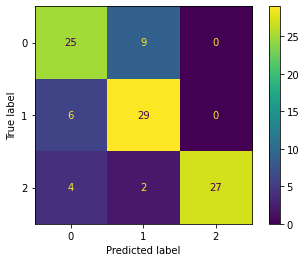

In [26]:
pred_train = model.predict(X_train)
cm = confusion_matrix(y_train, pred_train, labels=model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

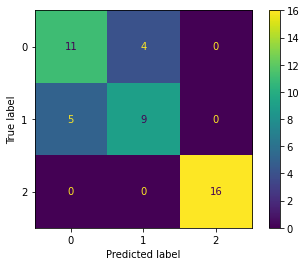

In [27]:
pred_test = model.predict(X_test)
cm = confusion_matrix(y_test, pred_test, labels=model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [34]:
y_proba = model.predict_proba(X_test)
rac = roc_auc_score(y_test,y_proba,average='macro',multi_class='ovr')
print(rac)

0.9212118108892303


In [1]:
# help(roc_curve)

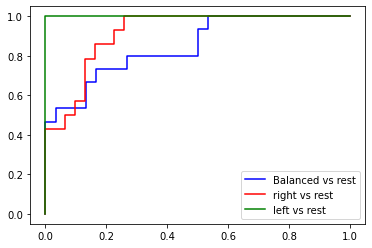

In [47]:
fpr = {}
tpr = {}
threshold = {}
classes = 3

for i in range(classes):
    fpr[i], tpr[i], threshold[i] = roc_curve(y_test,y_proba[:,i],pos_label=i)
plt.plot(fpr[0],tpr[0],linestyle ="-",c='b',label='Balanced vs rest')
plt.plot(fpr[1],tpr[1],linestyle ="-",c='r',label='right vs rest')
plt.plot(fpr[2],tpr[2],linestyle ="-",c='g',label='left vs rest')
plt.plot([[0,0],[1,1]],linestyle="--",c='black')
plt.legend()